# WS 1.6: Understanding Ordinary Differential Equation

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 60px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px" />
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px" />

</h1>
<h2 style="height: 10px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Week 1.6. For: 9th October, 2024.*

## Overview


This assignment is aimed to develop an understanding of the **Ordinary Differential Equation (ODE)**. There will be two sections about cooling and heating scenerios, corresponding to the first-order and the second-order ODEs. Please go through the text that follows and perform all steps outlined therein.

## Section 1: First-order ODE
### 1.1 Linear ODE
In the study of heat transfer, **Newton's law of cooling** is a physical law which states that the rate of heat loss of a body is directly proportional to the difference in the temperatures between the body and its environment. It can be expressed in the form of ODE, as below:

$$\frac{dT}{dt}=-k(T - T_s)$$



where $T$ is the temperature of the object at time $t$, $T_s$ is the temperature of the surrounding and assumed to be constant, and $k$ is the constant that characterizes the ability of the object to exchange the
heat energy (unit 1/s), which depends on the specific material properties.


Now, Let's consider an object with the initial temperature of  50°C in a surrounding environment with constant temperature at 20°C. The constant of heat exchange between the object and the environment is 0.5 $sec^-1$.


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1:</b>
 
Suppose the considered period of time is long enough (bring it to steady state), what will be the final temperature of the object? 
    
**Write your answer in the following markdown cell.**
 
</p>
</div>

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; width:95%; border-radius: 10px">
<p>Your answers for Task 1:
<p>
    
20°C 
    
*This is because the body's temperature, $T$, will tend to the ambience temperature in the long term. The decrease will be abrupt at the beginning and will slow down as time passes $T(t=large) = T_s = 20°C$.*

</p>
</div>


Next, let's evaluate the temperature of the object by checking it at a series of time points.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2:</b>

Write the algebraic representation of the ODE using Explicit Euler.
 
</p>
</div>

 <div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; width:95%; border-radius: 10px">
<p>
Answer for Task 2:
<p>
    
 $$ T_{i+1} = T_{i}-k(T_{i} - T_s)dt$$



How to get there:

$$
\int_{t}^{t+1} \frac{dT}{dt} dt=\int_{t}^{t+1}-k(T - T_s)dt
$$
$$
\int_{t}^{t+1} T' dt=\int_{t}^{t+1}f(t)dt
$$

FTC (fundamental theorem of calculus) for left side and using left rieman to approximate right term

$$
T_{t+1} - T_t =  \Delta t f(t_i)
$$

$$
T_{t+1}= T_t + \Delta t f(t_i)
$$

$$
T_{t+1}= T_t - k(T_t - T_s)
$$

or from forward finite difference
</p>
</div>

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3:</b>

Compute the temperature evolution in the next 60 seconds. This task is defined in subtasks.
 
</p>
</div>

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.1:</b> 

The time step of 5 seconds is constant. Discretize the time points, the solution vector $T$ and define the initial condition.
 
</p>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

dt =5                          
t_end = 60  
Ts =  20       # [C] 
k = 0.5        # [sec^-1]

t = np.arange(0,t_end+dt,dt)
n = len(t)
T = np.empty(n)
T[0] = 50



<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.2:</b> 

Implement your time discretization and find the solution from $t=0$ until $t=60$ sec. 
 
</p>
</div>

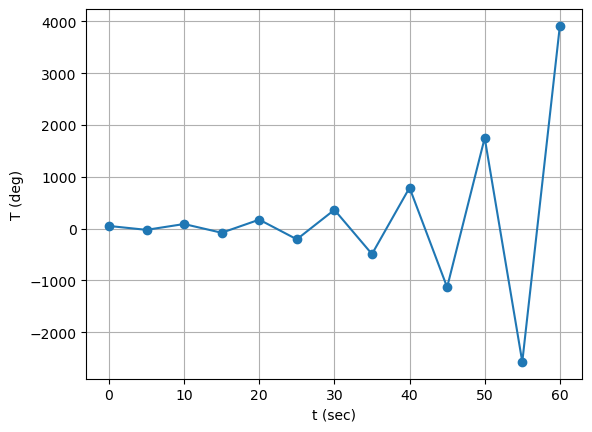

In [2]:
for i in range(n-1):
    T[i+1] = T[i]-k*(T[i]-Ts)*dt 
    
plt.plot(t, T, 'o-')
plt.xlabel('t (sec)')
plt.ylabel('T (deg)')
plt.grid()

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.3:</b>

Try different time steps to check the stability of the calculation. At which value the solution is stable?
 
</p>
</div>

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; width:95%; border-radius: 10px">
<p>
<b>Answer:</b> 
    
4 seconds is the limit between an unstable and a stable solution.

</p>
</div>

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.4:</b>

Obtain the mathematical expression that proves your stability criteria.
 
</p>
</div>

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; width:95%; border-radius: 10px">
<p> Answer
<p>
    
$$
\frac{dT}{dt}= -k(T-Ts)
$$

$$
\int \frac{1}{(T-Ts)}dT=\int -k dt
$$

$$
ln|T-Ts| = -kt +C
$$

$$
T-Ts = Ce^{-kt}
$$

$$
T= Ts +Ce^{-kt}
$$


This is an Explicit Euler scheme, thus is conditionally stable, with the criterion: $ |1-k*dt|<1$. 

Solving for n time steps, the solution can be generalized as $T_n=T_0(1-k\Delta t)^n + k \Delta t T_s \left[ (1-k \Delta t)^{n-1} + (1-k \Delta t)^{n-2} + ... + (1-k \Delta t)^{0} \right]$   

The criterion of stability is $ |1-k*dt|<1$. Otherwise, the solution would tend to grow instead of decaying. 
Then $|k*dt| < 2$, thus $dt < 4$. 

</p>
</div>

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.5:</b>

Now, discretize the equation using Implicit (Backward) Euler. Can you find a time step that makes the problem unstable?
 
</p>
</div>

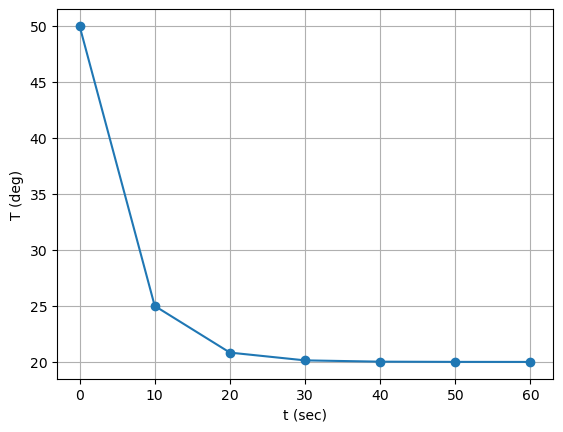

In [3]:
dt = 10                          
t_end = 60  
Ts =  20       # [C] 
k = 0.5        # [sec^-1]

t = np.arange(0,t_end+dt,dt)
n = len(t)
T = np.empty(n)
T[0] = 50     

for i in range(n-1):
    T[i+1] = (T[i]+k*Ts*dt)/(1+k*dt) 
    
plt.plot(t, T, 'o-')
plt.xlabel('t (sec)')
plt.ylabel('T (deg)')
plt.grid()

## Section 2: Second-order ODE
### Background
The following 1D equation describes the steady state solution of the temperature along a pin that sticks out of a furnace. The rest of the pin is exposed to the ambient. 

$$
\frac{d^2T}{dx^2} -\alpha(T-T_s)=0
$$

The ambient temperature is $T_s= 30^o$ C and the temperature at the wall is $250^o$ C. The length of the pin is 0.1m. Your grid should have a spatial step of 0.02 m. Finally, $\alpha=500$.


The solution includes the steps:
1. Use the Taylor series to obtain an approximation for the derivatives;
2. Discretize the equation;
3. Define parameters and grid;
4. Provide boundary conditions;
5. Build matrix with solution $AT=b$
6. Solve the matrix

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 5:</b>

Below we already provide the code structured that solves the equation with the above Dirichlet conditions and using a central difference approximation of the second derivative. Complete the code to complete the matrix and vectors. **Write in paper (add the image) the matrix A, and the vectors T and b.**
    


<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; width:95%; border-radius: 10px">
<p> Answer
<p>
    
Add the image.

**For $i = 1$:**
The finite difference approximation for the first internal node is:

$$
\frac{1}{\Delta x^2}(T_0 - 2T_1 + T_2) - \alpha T_1 + \alpha T_s = 0
$$

Next, we multiply by $\Delta x^2$ and substitute the boundary condition for $T_0$. Notice that the only unknown solutions are $T_1$ and $T_2$
Rearranging the terms gives:

$$
-(2 + \alpha \Delta x^2) T_1 + T_2 = -\alpha T_s \Delta x^2 - T_0
$$

**For $i = 2$:**
The finite difference approximation for the second internal node is:

$$
\frac{1}{\Delta x^2}(T_1 - 2T_2 + T_3) - \alpha T_2 + \alpha T_s = 0
$$

Rearranging the terms:

$$
T_1 - (2 + \alpha \Delta x^2) T_2 + T_3 = -\alpha T_s \Delta x^2
$$

**For $i = 3$:**
The finite difference approximation for the third internal node is:

$$
\frac{1}{\Delta x^2}(T_2 - 2T_3 + T_4) - \alpha T_3 + \alpha T_s = 0
$$

Notice that now we can plug in our other bc $T_5$ and rearrange the terms:

$$
(T_3 - (2 + \alpha \Delta x^2) T_4 ) = -\alpha Ts \Delta x^2 -T_5 
$$

We can now move the equations in the Ax=y form:

$$
\begin{bmatrix}
 -(2 + \alpha \Delta x^2) & 1 & 0 & 0 \\
1 & -(2 + \alpha \Delta x^2) & 1 & 0 \\
0 & 1 & -(2 + \alpha \Delta x^2) & 1 \\
0 & 0 & 1 & -(2 + \alpha \Delta x^2)
\end{bmatrix} \begin{bmatrix}
T_1 \\
T_2 \\
T_3 \\
T_4
\end{bmatrix}
=
\begin{bmatrix}
-\alpha Ts \Delta x^2 -T_0\\
-\alpha Ts \Delta x^2 \\
-\alpha Ts \Delta x^2\\
-\alpha Ts \Delta x^2 -T_5
\end{bmatrix}
$$



</p>
</div>

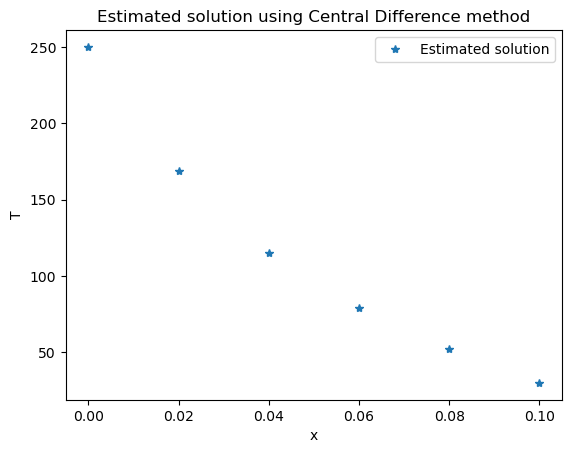

The estimated temperature at the nodes are: ['250.00', '168.77', '115.29', '78.86', '52.21', '30.00'] [C]


In [4]:
import numpy as np 
import matplotlib.pyplot as plt

Ts = 30
alpha = 500
dx=0.02

# grid creation
x = np.arange(0,0.1+dx,dx)
T = np.zeros(x.shape)
n=len(x)

# boundary conditions
T[0] = 250
T[-1] = Ts

# Building matrix A
matrix_element = -(2+dx**2*alpha)
A = np.zeros((len(x)-2,len(x)-2))
np.fill_diagonal(A, matrix_element)
A[np.arange(n-3), np.arange(1, n-2)] = 1  # Upper diagonal
A[np.arange(1, n-2), np.arange(n-3)] = 1  # Lower diagonal

# Building vector b
b_element = -dx**2*alpha*Ts
b = np.zeros(len(x)-2) + b_element
b[0] = b[0] - T[0]
b[-1] = b[-1] - T[-1]

# Solving the system

T[1:-1] = np.linalg.solve(A,b)

plt.plot(x,T,'*',label='Estimated solution')
plt.xlabel('x')
plt.ylabel('T')
plt.title('Estimated solution using Central Difference method')
plt.legend()
plt.show()

print(f'The estimated temperature at the nodes are: {[f"{temp:.2f}" for temp in T]} [C]')



<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 6:</b>

Copy the code above below and modify it to replace the Dirichlet condition at the right BC for a Neumann condition such that there $\frac{dT}{dx}=0$. Approximate the Neuman boundary $\frac{dT}{dx}=0$ by using the Backward difference for first order differential equation of first order accuracy. 

How does the temperature profile changes?  

**Remember to change the title of the plot to indicate that now the BC is of the Neumann type**

</p>
</div>

The first elements for i = 1,2,3 are the same as above in task 5

The neuman bc is on the last node 

$$
\frac{dT}{dx} = \frac{T_i - T_{i-1}}{\Delta x} 
$$

Neuman bc $$\frac{dT_5}{dx}=0 \approx \frac{T_5 - T_{4}}{\Delta x}  $$
Therefore $T_5=T_4$

**For $i = 4$**

$$
\frac{1}{\Delta x^2}(T_3-2T_4+T_5) - \alpha T_4 + \alpha Ts =0
$$

Plug in BC $T_5=T_4$

$$
\frac{1}{\Delta x^2}(T_3-2T_4+T_4) - \alpha T_4 + \alpha Ts =0
$$

$$
T_3-(1 + \alpha \Delta x^2)T_4  = \alpha Ts 
$$

We can now move the equations in the Ax=y form:

$$
\begin{bmatrix}
 -(2 + \alpha \Delta x^2) & 1 & 0 & 0 \\
1 & -(2 + \alpha \Delta x^2) & 1 & 0 \\
0 & 1 & -(2 + \alpha \Delta x^2) & 1 \\
0 & 0 & 1 & -(1 + \alpha \Delta x^2)
\end{bmatrix} \begin{bmatrix}
T_1 \\
T_2 \\
T_3 \\
T_4
\end{bmatrix}
=
\begin{bmatrix}
-\alpha Ts \Delta x^2 -T_0\\
-\alpha Ts \Delta x^2 \\
-\alpha Ts \Delta x^2\\
-\alpha Ts \Delta x^2 
\end{bmatrix}
$$

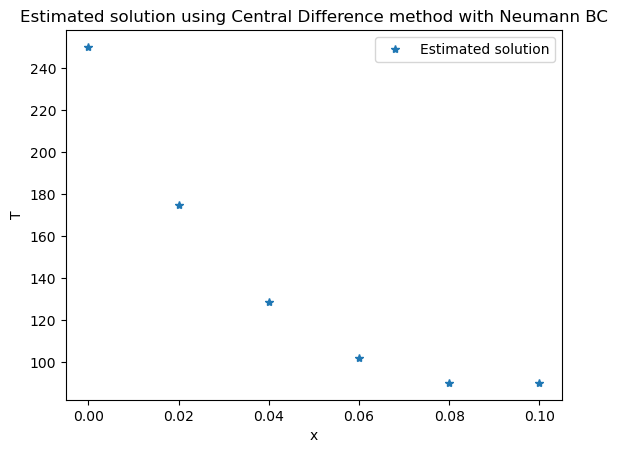

The estimated temperature at the nodes are: ['250.00', '174.84', '128.64', '102.18', '90.15', '90.15'] [C]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
 
Ts = 30
alpha = 500
dx=0.02
 
# grid creation
x = np.arange(0,0.1+dx,dx)
T = np.zeros(x.shape)
n=len(x)
 
# boundary conditions
T[0] = 250
 
 
# Building matrix A
matrix_element = -(2+dx**2*alpha)
A = np.zeros((len(x)-2,len(x)-2))
np.fill_diagonal(A, matrix_element)
A[np.arange(n-3), np.arange(1, n-2)] = 1  # Upper diagonal
A[np.arange(1, n-2), np.arange(n-3)] = 1  # Lower diagonal
 
A[-1,-1] = -(1+dx**2*alpha)  #the lower right corner of the matrix changes
 
# Building vector b
b_element = -dx**2*alpha*Ts
b = np.zeros(len(x)-2) + b_element
b[0] = b[0] - T[0]
b[-1] = b[-1]               #the vector b also changes
 
# Solving the system

T[1:-1] = np.linalg.solve(A,b)
T[-1] = T[-2]  
 
plt.plot(x,T,'*',label='Estimated solution')
plt.xlabel('x')
plt.ylabel('T')
plt.title('Estimated solution using Central Difference method with Neumann BC')
plt.legend()
plt.show()
 
print(f'The estimated temperature at the nodes are: {[f"{temp:.2f}" for temp in T]} [C]')


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 7:</b>

Now, instead of using the central difference for approximating the second derivative. Use the forward difference to replace the second derivative (first order accurate). **Write the algebraic representation of the differential equation below.**

</p>
</div>

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; width:95%; border-radius: 10px">
<p> Answer
<p>
Forward difference for second order differential equation:

$$
\frac{T_i-2T_{i+1}+T_{i+2}}{\Delta x^2}-\alpha(T_i-T_s) = 0
$$

**For $i = 0$:**
The finite difference approximation for the first internal node is:

$$
\frac{1}{\Delta x^2}(T_0 - 2T_1 + T_2) - \alpha T_0 + \alpha T_s = 0
$$


$$
-2T_1 +T_2 = -(1+alpha)T_0 - \alpha T_s \Delta x^2
$$

**For $i = 1$:**
The finite difference approximation for the second internal node is:

$$
\frac{1}{\Delta x^2}(T_1 - 2T_2 + T_3) - \alpha T_1 + \alpha T_s = 0
$$

Rearranging the terms:

$$
(1 - \alpha \Delta x^2)T_1 - 2T_2 + T_3 = -\alpha T_s \Delta x^2
$$

**For $i = 2$:**
The finite difference approximation for the second internal node is:

$$
\frac{1}{\Delta x^2}(T_2 - 2T_3 + T_4) - \alpha T_2 + \alpha T_s = 0
$$

Rearranging the terms:

$$
(1 - \alpha \Delta x^2)T_2 - T_3 + T_4 = -\alpha T_s \Delta x^2
$$

**For $i = 3$:**
The finite difference approximation for the second internal node is:

$$
\frac{1}{\Delta x^2}(T_3 - 2T_4 + T_5) - \alpha T_3 + \alpha T_s = 0
$$

Rearranging the terms:

$$
(1 - \alpha \Delta x^2)T_3 - 2T_4 = -\alpha T_s \Delta x^2 -T_5
$$



</p>
</div>


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 8:</b>

Now, write the resulting matrix A, the vector T and the vector b.
    
</p>
</div>

We can now move the equations in the Ax=y form:

$$
\begin{bmatrix}
 -2  & 1 & 0 & 0 \\
(1- \alpha \Delta x^2) & -2  & 1 & 0 \\
0 & (1- \alpha \Delta x^2) & -2 & 1 \\
0 & 0 & (1- \alpha \Delta x^2) & -2
\end{bmatrix} \begin{bmatrix}
T_1 \\
T_2 \\
T_3 \\
T_4
\end{bmatrix}
=
\begin{bmatrix}
-\alpha Ts \Delta x^2 -T_0\\
-\alpha Ts \Delta x^2 \\
-\alpha Ts \Delta x^2\\
-\alpha Ts \Delta x^2 -T_5
\end{bmatrix}
$$

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; width:95%; border-radius: 10px">
<p> Answer
<p>
    
Add the image.

</p>
</div>


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 9:</b>

Copy the code of task 5 below, modify it accordingly to your new discretization (using FD for the second derivative in space). Keep Dirichlet conditions. 

How different are the values of the temperature with respect to task 5? Which solution is expected to be more accurate?

</p>
</div>

[[-2.       1.       0.      ...  0.       0.       0.     ]
 [ 0.99992 -2.       1.      ...  0.       0.       0.     ]
 [ 0.       0.99992 -2.      ...  0.       0.       0.     ]
 ...
 [ 0.       0.       0.      ... -2.       1.       0.     ]
 [ 0.       0.       0.      ...  0.99992 -2.       1.     ]
 [ 0.       0.       0.      ...  0.       0.99992 -2.     ]]


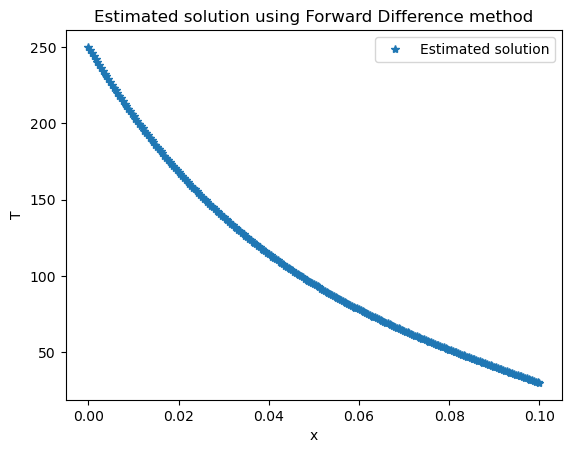

The x values =============================: ['0.0000', '0.0004', '0.0008', '0.0012', '0.0016', '0.0020', '0.0024', '0.0028', '0.0032', '0.0036', '0.0040', '0.0044', '0.0048', '0.0052', '0.0056', '0.0060', '0.0064', '0.0068', '0.0072', '0.0076', '0.0080', '0.0084', '0.0088', '0.0092', '0.0096', '0.0100', '0.0104', '0.0108', '0.0112', '0.0116', '0.0120', '0.0124', '0.0128', '0.0132', '0.0136', '0.0140', '0.0144', '0.0148', '0.0152', '0.0156', '0.0160', '0.0164', '0.0168', '0.0172', '0.0176', '0.0180', '0.0184', '0.0188', '0.0192', '0.0196', '0.0200', '0.0204', '0.0208', '0.0212', '0.0216', '0.0220', '0.0224', '0.0228', '0.0232', '0.0236', '0.0240', '0.0244', '0.0248', '0.0252', '0.0256', '0.0260', '0.0264', '0.0268', '0.0272', '0.0276', '0.0280', '0.0284', '0.0288', '0.0292', '0.0296', '0.0300', '0.0304', '0.0308', '0.0312', '0.0316', '0.0320', '0.0324', '0.0328', '0.0332', '0.0336', '0.0340', '0.0344', '0.0348', '0.0352', '0.0356', '0.0360', '0.0364', '0.0368', '0.0372', '0.0376', '0.03

In [6]:
import numpy as np 
import matplotlib.pyplot as plt

Ts = 30
alpha = 500
dx=0.0004 # The grid size is reduced to (0.02^2 = 0.0004)

# grid creation
x = np.arange(0,0.1+dx,dx)
T = np.zeros(x.shape)
n=len(x)

# boundary conditions
T[0] = 250
T[-1] = Ts

# Building matrix A
matrix_element = 1-alpha*dx**2    # The matrix element changes 
A = np.zeros((len(x)-2,len(x)-2))
np.fill_diagonal(A, -2)
A[np.arange(n-3), np.arange(1, n-2)] = 1  # Upper diagonal
A[np.arange(1, n-2), np.arange(n-3)] = matrix_element  # Lower diagonal
print(A)

# Building vector b
b_element = -dx**2*alpha*Ts
b = np.zeros(len(x)-2) + b_element
b[0] = b[0] - matrix_element * T[0]
b[-1] = b[-1] - T[-1]

# Solving the system

T[1:-1] = np.linalg.solve(A,b)

plt.plot(x,T,'*',label='Estimated solution')
plt.xlabel('x')
plt.ylabel('T')
plt.title('Estimated solution using Forward Difference method')
plt.legend()
plt.show()

print(f'The x values =============================: {[f"{x_loc:.4f}" for x_loc in x]} [m]')
print(f'The estimated temperature at the nodes are: {[f"{temp:.2f}" for temp in T]} [C]')

ind = np.argmin(abs(x-0.02))
print(f'The temperature at x=0.02 is: {T[ind]:.2f} [C]')

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 9:</b>

How much finer does your grid has to be in the forward difference implementation to get a similar value at x = 0.02 as in the central difference implementation? Vary your dx.


</p>
</div>

you can test this above make the temperature the same at x=0.02 

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; width:95%; border-radius: 10px">
<p>
<b>Bonus note:</b> 
    
The matrix inversion using numpy is one way to solve the system, another is the gauss_jordan written below and another one is the sparse matrix based method in the cell afterwards. Here, we will just have a brief comparison to see how these solvers perform when the matrix is large. Change dx to 0.0002 of the code in task 5 and run it. Now, you should have a matrix A with a high resolution that solves the second degree ODE. Test the time each method takes.
    
</p>
</div>

In [7]:
def gauss_jordan(A, b):
    """
    Solves the system of linear equations Ax = b using Gauss-Jordan elimination.
    
    Parameters:
    A (numpy.ndarray): Coefficient matrix (n x n).
    b (numpy.ndarray): Right-hand side vector (n).
    
    Returns:
    numpy.ndarray: Solution vector (x) if the system has a unique solution.
    """
    # Form the augmented matrix [A | b]
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    aug_matrix = np.hstack([A, b.reshape(-1, 1)])
    
    n = len(b)  # Number of rows (or variables)
    
    for i in range(n):
        # Partial pivoting to handle zero diagonal elements (optional, but more robust)
        max_row = np.argmax(np.abs(aug_matrix[i:, i])) + i
        if aug_matrix[max_row, i] == 0:
            raise ValueError("The matrix is singular and cannot be solved.")
        if max_row != i:
            aug_matrix[[i, max_row]] = aug_matrix[[max_row, i]]
        
        # Make the diagonal element 1
        aug_matrix[i] = aug_matrix[i] / aug_matrix[i, i]
        
        # Make all other elements in the current column 0
        for j in range(n):
            if j != i:
                aug_matrix[j] -= aug_matrix[j, i] * aug_matrix[i]
    
    # Extract the solution (last column of the augmented matrix)
    return aug_matrix[:, -1]

In [8]:
import time
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve

# Inverted matrix solution
start_time = time.time()
A_inv = np.linalg.inv(A)
T[1:-1] = A_inv @ b
time_used_0 = time.time() - start_time
print(f"The time used by direct matrix inversion solution is {time_used_0: 0.3e} sec")
assert np.allclose(np.dot(A, T[1:-1]), b), "Oops! The calculation is wrong.."


# Gauss-jordan solution
start_time = time.time()
u1 = gauss_jordan(A, b)
time_used_1 = time.time() - start_time
print(f"The time used by Gauss-jordan solution is {time_used_1: 0.3e} sec")
#Check if the solution is correct:
assert np.allclose(np.dot(A, u1), b), "Oops! The calculation is wrong.."

# Solution by a sparse matrix solver 
start_time = time.time()
A_sparse = csc_matrix(A)# Convert A to a compressed sparse column (CSC) matrix
u2 = spsolve(A_sparse, b)
time_used_2 = time.time() - start_time
print(f"The time used by the sparse matrix solver is {time_used_2: 0.3e} sec")
#Check if the solution is correct:
assert np.allclose(np.dot(A, u2), b), "Oops! The calculation is wrong.."

The time used by direct matrix inversion solution is  2.522e-03 sec
The time used by Gauss-jordan solution is  2.020e-01 sec
The time used by the sparse matrix solver is  3.001e-03 sec


**End of notebook.**
<h2 style="height: 60px">
</h2>
<h3 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; bottom: 60px; right: 50px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">
      <img alt="Creative Commons License" style="border-width:; width:88px; height:auto; padding-top:10px" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png"/>
    </a>
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png"/>
    </a>
    
</h3>
<span style="font-size: 75%">
&copy; Copyright 2023 <a rel="MUDE Team" href="https://studiegids.tudelft.nl/a101_displayCourse.do?course_id=65595">MUDE Teaching Team</a> TU Delft. This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.